In [7]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

dt = pd.read_csv('q-GNPC96.txt',delim_whitespace = True)
print(dt)

order = sm.tsa.arma_order_select_ic(dt['gnp'].values,max_ar=6,max_ma=4,ic='aic')['aic_min_order']

print(order)

model = ARIMA(dt['gnp'].values, order=(5,1,0))
model_fit = model.fit(disp=0)
print(sm.stats.durbin_watson(model_fit.resid))

     year  mon  day      gnp
0    1947    1    1   1780.4
1    1947    4    1   1778.1
2    1947    7    1   1776.6
3    1947   10    1   1804.0
4    1948    1    1   1833.4
..    ...  ...  ...      ...
254  2010    7    1  13328.9
255  2010   10    1  13383.9
256  2011    1    1  13432.2
257  2011    4    1  13504.2
258  2011    7    1  13567.9

[259 rows x 4 columns]
(5, 2)
1.9743491171586955


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-package

     year  mon  day      gnp
0    1947    1    1   1780.4
1    1947    4    1   1778.1
2    1947    7    1   1776.6
3    1947   10    1   1804.0
4    1948    1    1   1833.4
..    ...  ...  ...      ...
254  2010    7    1  13328.9
255  2010   10    1  13383.9
256  2011    1    1  13432.2
257  2011    4    1  13504.2
258  2011    7    1  13567.9

[259 rows x 4 columns]
1.9605459114648938


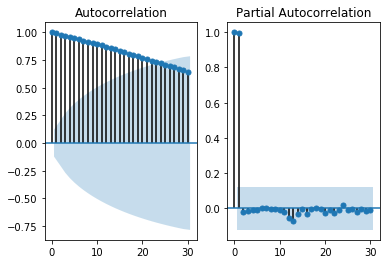

In [8]:
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv('q-GNPC96.txt',delim_whitespace = True)
print(dt)
# 将画面一分为二
# 第一个画自相关图
# 第二个画偏自相关图
# 将画面一分为二
axe1=plt.subplot(121)
axe2=plt.subplot(122)
#在第一个画面中画出序列的自相关系数图
plot1=plot_acf(dt['gnp'].values,lags=30,ax=axe1)
#在第二个画面中画出序列的偏自相关系数图
plot2=plot_pacf(dt['gnp'].values,lags=30,ax=axe2)

model = ARIMA(dt['gnp'].values, order=(2,1,0))
model_fit = model.fit(disp=0)
print(sm.stats.durbin_watson(model_fit.resid))